In [1]:
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip

#This will be doing most of the work
import networkx as nx

import sklearn #For generating some matrices
import pandas #For DataFrames
import numpy as np #For arrays
import matplotlib.pyplot as plt #For plotting
import seaborn #Makes the plots look nice
import scipy #Some stats
import nltk #a little language code
from IPython.display import Image #for pics

import pickle #if you want to save layouts
import os

%matplotlib inline

In [2]:
g = nx.Graph()
g

In [3]:
g.add_node(1)
g.add_node(2)
g.add_node(3)
len(g.nodes)

3

In [4]:
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 3\nNumber of edges: 0\nAverage degree:   0.0000'

In [5]:
g.nodes[1]['name']='Sundae'
g.nodes[1]

{'name': 'Sundae'}

In [6]:
g.add_edges_from([(1,2),(2,3),(3,1),(1,4)])
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


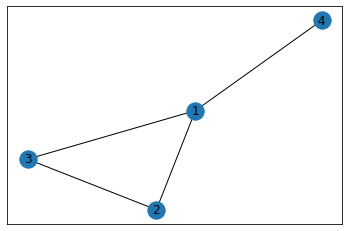

In [7]:
nx.draw_networkx(g)


In [8]:
df = pandas.read_csv("/Users/shiyipeng/Desktop/training.1600000.processed.noemoticon.csv",index_col=0)
df = df.rename(columns={'1467810369':'id','Mon Apr 06 22:19:45 PDT 2009':'timestamp','NO_QUERY':'query','_TheSpecialOne_':'username',"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":'text'})
print(df.head)
print(df.columns)


<bound method NDFrame.head of             id                     timestamp     query       username  \
0                                                                       
0   1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
0   1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
0   1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
0   1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
0   1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   
..         ...                           ...       ...            ...   
0   1691043606  Sun May 03 16:58:00 PDT 2009  NO_QUERY         mollzz   
0   1691043664  Sun May 03 16:58:00 PDT 2009  NO_QUERY        NICH0LE   
0   1691043890  Sun May 03 16:58:02 PDT 2009  NO_QUERY      crittyjoy   
0   1691043928  Sun May 03 16:58:03 PDT 2009  NO_QUERY     therealamz   
0   1691043941  Sun May 03 16:58:03 PDT 2009  NO_QUERY    ezpz_sammiz   

                    

In [9]:
df = df.iloc[:1000,:]
df = df.reset_index(drop=True)
df

,id,timestamp,query,username,text
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...
995,1468055266,Mon Apr 06 23:28:41 PDT 2009,NO_QUERY,ohmigosh_dusti,@t_wolfe i miss u too. i'm totally comin back...
996,1468055472,Mon Apr 06 23:28:43 PDT 2009,NO_QUERY,tiphaniebrooke,@sniffinglue ohhh. I love it. ps I'm sad we di...
997,1468055604,Mon Apr 06 23:28:45 PDT 2009,NO_QUERY,rinahannah,And somehow I still end up in this place
998,1468055791,Mon Apr 06 23:28:49 PDT 2009,NO_QUERY,ecjc,"@kisluvkis oh that is very sad, poor boy."


In [10]:
df['tokenized_sents']=df['text'].apply(lambda x:[lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
df['normalized_sents']=df['tokenized_sents'].apply(lambda x:[lucem_illud_2020.normalizeTokens(x)for s in x])

In [11]:
def wordCooccurrence(sentences,makeMatrix=False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w:i for i,w in enumerate(wordLst)}
    wordCoCounts = {}
    coOcMat = np.zeros((len(wordIndices),len(wordIndices)))
    for sent in sentences:
        for i,wordl in enumerate(sent):
            wordlIndex = wordIndices[wordl]
            for word2 in sent[i+1:]:
                coOcMat[wordlIndex][wordIndices[word2]] += 1
        if makeMatrix:
            return coOcMat,wordLst

        else:
            coOcMat = coOcMat.T + coOcMat
            g = nx.convert_matrix.from_numpy_matrix(coOcMat)
            g = nx.relabel_nodes(g,{i:w for i ,w in enumerate(wordLst)})
            return g


In [12]:
df['normalized_sents']

0      [[upset, update, facebook, texting, cry, resul...
1      [[@kenichan, dive, time, ball, manage, save, r...
2                      [[body, feel, itchy, like, fire]]
3      [[@nationwideclass, behave, be, mad], [@nation...
4                 [[@kwesidei, crow], [@kwesidei, crow]]
                             ...                        
995    [[@t_wolfe, miss, u, be, totally, comin, tho, ...
996    [[@sniffinglue, ohhh, love, ps, be, sad, hang]...
997                                       [[end, place]]
998    [[@kisluvkis, oh, sad, poor, boy], [@kisluvkis...
999    [[@jonathanrknight, @silver_tulip27, um, hell,...
Name: normalized_sents, Length: 1000, dtype: object

In [13]:
df['normalized_sents'][0]

[['upset',
  'update',
  'facebook',
  'texting',
  'cry',
  'result',
  'school',
  'today',
  'blah'],
 ['upset',
  'update',
  'facebook',
  'texting',
  'cry',
  'result',
  'school',
  'today',
  'blah']]

In [14]:
df['normalized_sents'][0][1]

['upset',
 'update',
 'facebook',
 'texting',
 'cry',
 'result',
 'school',
 'today',
 'blah']

In [15]:
g = wordCooccurrence(df['normalized_sents'][:100].sum())

In [16]:
len(g.nodes)

487

In [17]:
len(g.edges)

36

In [18]:
nx.to_numpy_matrix(g)[:10,:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
def tokenize(text):
    tokenlist = lucem_illud_2020.word_tokenize(text)
    normalized = lucem_illud_2020.normalizeTokens(tokenlist)
    return normalized

import sklearn.feature_extraction
senVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
senVects_incidence = senVectorizer.fit_transform(df['text'])
senVects_incidence.shape

(1000, 2750)

In [20]:
g_2mode = nx.Graph()
g_2mode.add_nodes_from((senVectorizer.get_feature_names()[i] for i in range(senVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(senVects_incidence.shape[0]), bipartite = 'doc')
g_2mode.add_edges_from(((d, senVectorizer.get_feature_names()[w], {'weight' : senVects_incidence[d, w]}) for d, w in zip(*senVects_incidence.nonzero())))

In [21]:
print(nx.info(g_2mode))


Name: 
Type: Graph
Number of nodes: 3750
Number of edges: 6528
Average degree:   3.4816


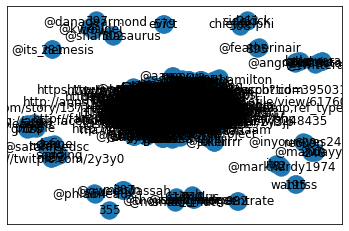

In [22]:
nx.draw_networkx(g_2mode)

In [23]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [24]:
gDoc = contractNetwork(g_2mode, 'doc')
print(nx.info(gDoc))

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 40357
Average degree:  80.7140


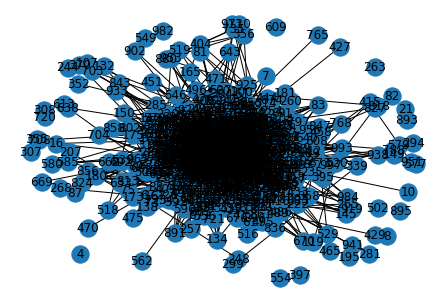

In [25]:
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()})

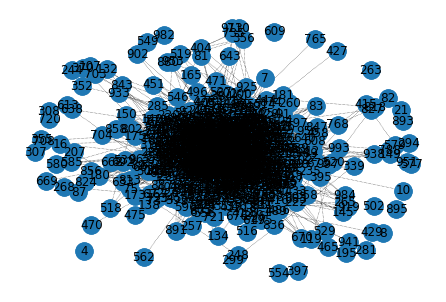

In [26]:
wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}, edgelist = edgesLow, style='dotted', width=.5)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=2)

In [27]:
print(len(df.iloc[81]['text']),"words:","\n",df.iloc[12]['text'].strip().replace('  ', '\n'))

16 words: 
 @octolinz16 It it counts, idk why I did either. you never talk to me anymore


In [28]:
print(len(df.iloc[78]['text']),"words:","\n",df.iloc[78]['text'].strip().replace('  ', '\n'))

97 words: 
 wonders why someone that u like so much can make you so unhappy in a split seccond . depressed .


In [29]:
gWord = contractNetwork(g_2mode, 'word')
print(nx.info(gWord))

Name: 
Type: Graph
Number of nodes: 2750
Number of edges: 21705
Average degree:  15.7855


In [30]:
wMean = np.mean([d['weight'] for n1, n2, d in gWord.edges(data = True)])
wMean

1.0842662980879982

In [31]:
g = wordCooccurrence(df['normalized_sents'][:100].sum())

In [32]:
len(g)

487

In [33]:
#g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 10])

In [34]:
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates 

In [35]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [36]:
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 36
Average degree:   8.0000


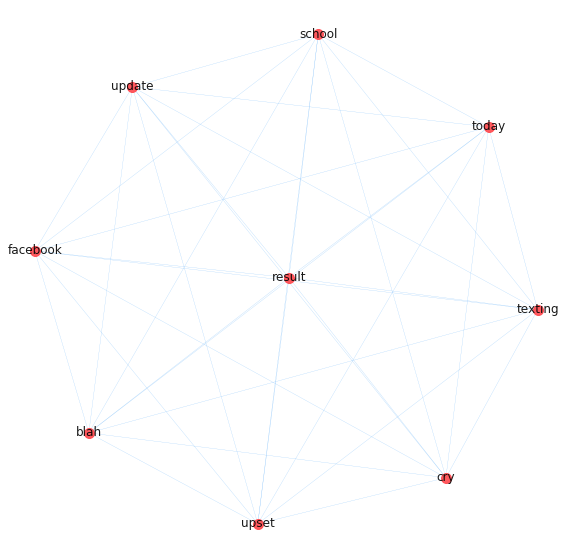

In [37]:
layout = nx.spring_layout(giant,weight='weight',iterations=100)
fig,ax = plt.subplots(figsize=(10,10))
nx.draw(giant, ax=ax, pos=layout, labels={n:n for n in giant.nodes()},
       width=.2,
       alpha=.9,
       node_size=100,
       node_color='xkcd:light red',
       edge_color='xkcd:sky blue')

In [38]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(giant))
c

[frozenset({'blah',
            'cry',
            'facebook',
            'result',
            'school',
            'texting',
            'today',
            'update',
            'upset'})]

In [39]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))


update, upset, school, blah, facebook, cry, result, texting, today


In [40]:
schoolNeighbors = giant.neighbors('school')
g_school = giant.subgraph(schoolNeighbors)
print(nx.info(g_school))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 28
Average degree:   7.0000


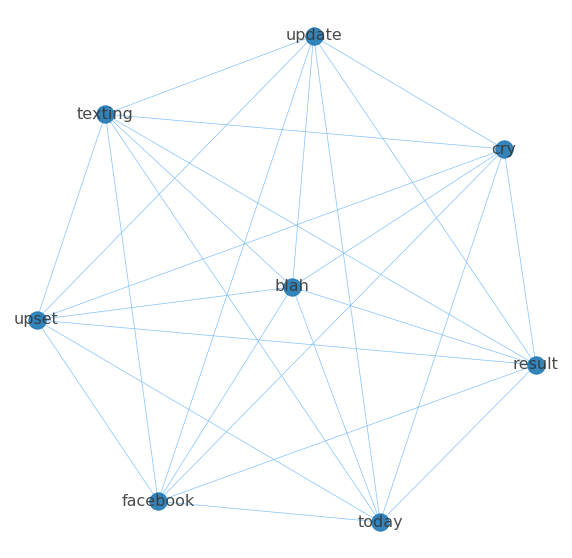

In [41]:
layout_sch = nx.spring_layout(g_school,weight='weight',iterations=100,k=.3)
fig,ax = plt.subplots(figsize=(10,10))
maxWeight = max((d['weight'] for n1,n2,d in g_school.edges(data=True)))
minWeight = min((d['weight'] for n1,n2,d in g_school.edges(data=True)))
nx.draw(g_school,ax=ax,pos=layout_sch,labels = {n:n for n in g_school.nodes()},
       width=[(d['weight']-minWeight+.7)/maxWeight for n1,n2,d in g_school.edges(data=True)],alpha=.9,font_size=16,font_color='xkcd:dark grey',edge_color='xkcd:sky blue',cmap=plt.get_cmap('plasma'))

In [42]:
schoolNeighbors=gWord.neighbors('school')
schoolNeighborsPlus1 = set(schoolNeighbors)
for n in schoolNeighbors:
    schoolNeighborsPlus1 |= set(giant.neighbors(n))
    
for x in schoolNeighborsPlus1:
    print(x)

okay
art
test
find
work
let
kinda
world
sure
fallon
bright
ready
watch
swell
bedtime
upset
understand
usual
be
result
dance
doubtful
gosh
thursday
@born_4_broadway
walk
damm
face
tmrw
morning
make
wish
lose
facebook
rape
suckssss
pre
project
drop
drain
interfere
sleep
book
look
tomorrow
day
energy
today
go
mraow
home
like
u
quot;he
cry
prepatory
grr
feel
guy
ignacius
broken&quot
update
blah
anymore
life
hard
texting
allergic
heart
mom
haha
foo
@endearingevania
break
want
silly
soon
wear
st
week.my
thing


In [43]:
g_school2 = giant.subgraph(schoolNeighborsPlus1)
print(nx.info(g_school2))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 28
Average degree:   7.0000


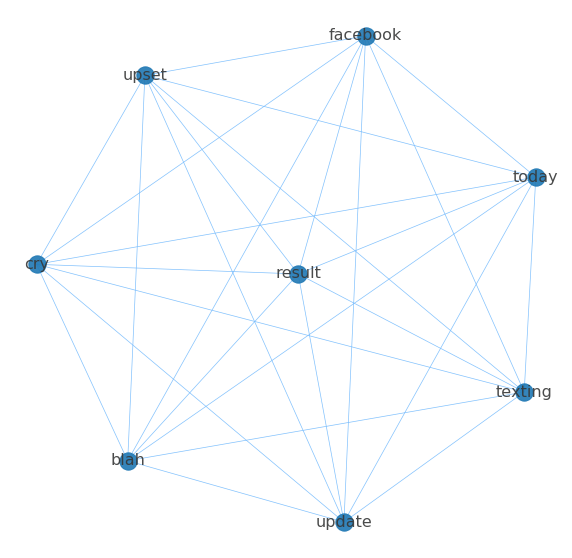

In [44]:
layout_sch = nx.spring_layout(g_school2,weight='weight',iterations=100,k=.3)
fig,ax=plt.subplots(figsize=(10,10))
centralities_sch = nx.eigenvector_centrality(g_school2)
maxC = max(centralities_sch.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in g_school2.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_school2.edges(data = True)))
nx.draw(g_school2, ax = ax, pos = layout_sch, labels = {n:n for n in g_school2.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_school2.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma'))

In [45]:
# Exercise 2
bookNeighbors=gWord.neighbors('book')
bookNeighborsPlus1 = set(bookNeighbors)
g_book2 = gWord.subgraph(bookNeighborsPlus1)
dcentralities = nx.degree_centrality(g_book2)
dcentralities['school']

0.11538461538461539

In [46]:
max(dcentralities.items(), key = lambda x : x[1])

('read', 0.44230769230769235)

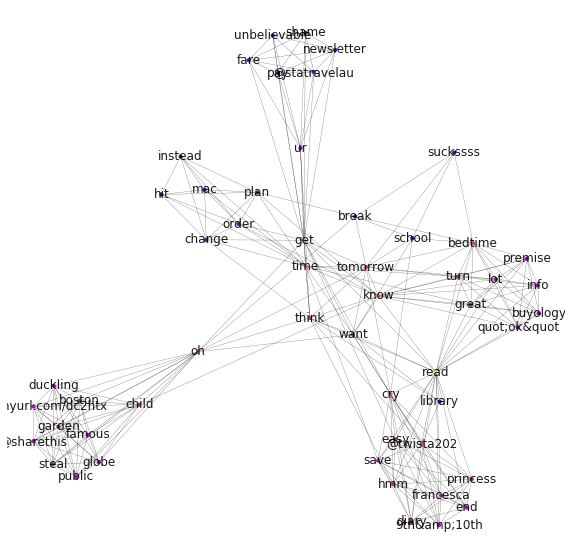

In [47]:
layout_book = nx.spring_layout(g_book2,weight='weight',iterations=100,k=.3)
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(dcentralities.items(), key = lambda x : x[1])[1]
nx.draw(g_book2, ax = ax, pos = layout_book, labels = {n:n for n in g_book2.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 10,
        node_color = [dcentralities[n] / maxC for n in g_book2.nodes],
        cmap = plt.get_cmap('plasma'))

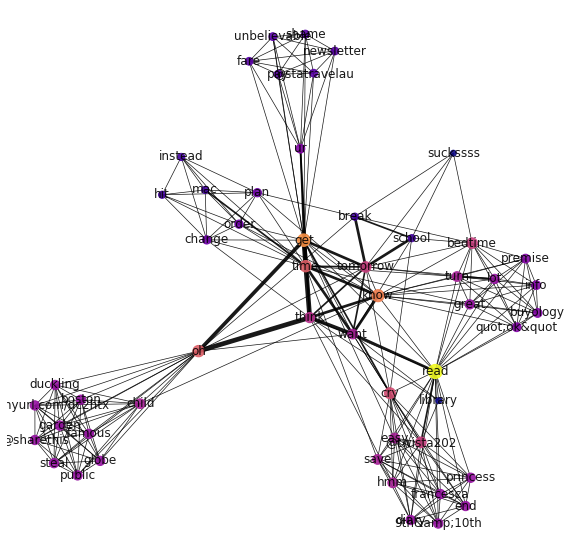

In [48]:
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(dcentralities.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in giant.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in giant.edges(data = True)))
nx.draw(g_book2, ax = ax, pos = layout_book, labels = {n:n for n in g_book2.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_book2.edges(data = True)], 
        alpha = .9, 
        node_color = [dcentralities[n] / maxC for n in g_book2.nodes],
        node_size = [dcentralities[n] / maxC * 200 for n in g_book2.nodes],
        cmap = plt.get_cmap('plasma'))

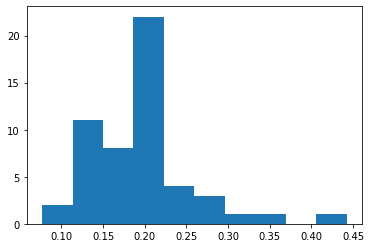

In [49]:
plt.hist(list(dcentralities.values()))
plt.show()

In [50]:
sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('read', 0.44230769230769235),
 ('get', 0.34615384615384615),
 ('know', 0.3269230769230769),
 ('time', 0.2884615384615385),
 ('oh', 0.2884615384615385),
 ('cry', 0.2692307692307693),
 ('tomorrow', 0.25),
 ('bedtime', 0.25),
 ('@twista202', 0.25),
 ('think', 0.23076923076923078)]

In [51]:
sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)[-10:]

[('pay', 0.13461538461538464),
 ('unbelievable', 0.13461538461538464),
 ('@statravelau', 0.13461538461538464),
 ('school', 0.11538461538461539),
 ('instead', 0.11538461538461539),
 ('break', 0.11538461538461539),
 ('hit', 0.11538461538461539),
 ('mac', 0.11538461538461539),
 ('library', 0.07692307692307693),
 ('suckssss', 0.07692307692307693)]

In [55]:
centralities = nx.betweenness.betweenness_centrality(g_book2)
centralities['read']

0.1453468948095645

In [56]:
max(centralities.items(), key = lambda x : x[1])

('get', 0.2607114950157937)

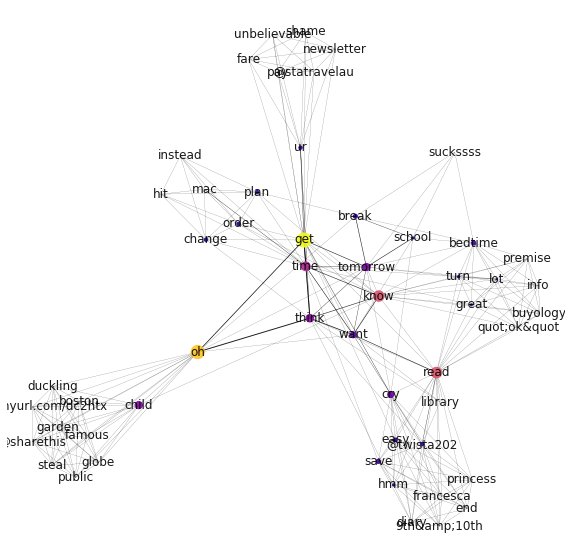

In [57]:

fig, ax = plt.subplots(figsize = (10,10))
maxC = max(centralities.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in g_book2.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_book2.edges(data = True)))
nx.draw(g_book2, ax = ax, pos = layout_book, labels = {n:n for n in g_book2.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_book2.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities[n] / maxC for n in g_book2.nodes],
        node_size = [centralities[n] / maxC * 200 for n in g_book2.nodes],
        cmap = plt.get_cmap('plasma'))

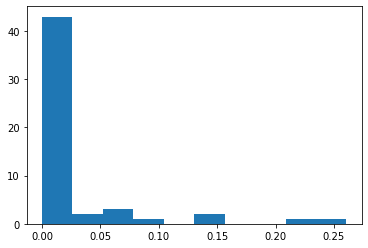

In [58]:
plt.hist(list(centralities.values()))
plt.show()

In [59]:
sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('read', 0.44230769230769235),
 ('get', 0.34615384615384615),
 ('know', 0.3269230769230769),
 ('time', 0.2884615384615385),
 ('oh', 0.2884615384615385),
 ('cry', 0.2692307692307693),
 ('tomorrow', 0.25),
 ('bedtime', 0.25),
 ('@twista202', 0.25),
 ('think', 0.23076923076923078)]

In [60]:
sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)[40:50]

[('newsletter', 0.13461538461538464),
 ('fare', 0.13461538461538464),
 ('shame', 0.13461538461538464),
 ('pay', 0.13461538461538464),
 ('unbelievable', 0.13461538461538464),
 ('@statravelau', 0.13461538461538464),
 ('school', 0.11538461538461539),
 ('instead', 0.11538461538461539),
 ('break', 0.11538461538461539),
 ('hit', 0.11538461538461539)]

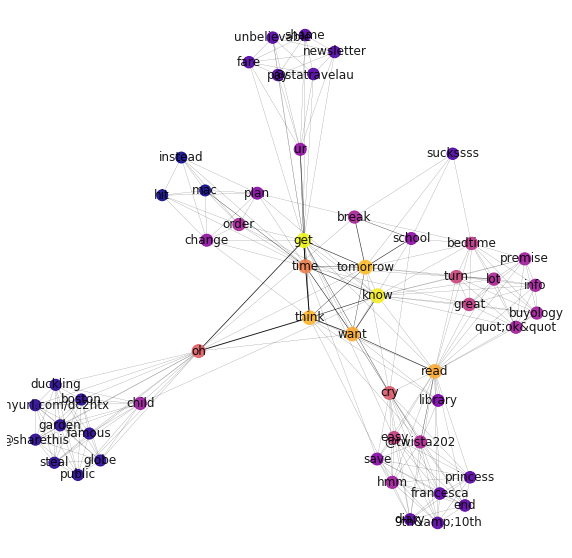

In [61]:
centralities = nx.closeness_centrality(g_book2)
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(centralities.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in g_book2.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_book2.edges(data = True)))
nx.draw(g_book2, ax = ax, pos = layout_book, labels = {n:n for n in g_book2.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_book2.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities[n] / maxC for n in g_book2.nodes],
        node_size = [centralities[n] / maxC * 200 for n in g_book2.nodes],
        cmap = plt.get_cmap('plasma'))

In [62]:
sorted(centralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('get', 0.6046511627906976),
 ('know', 0.5977011494252874),
 ('tomorrow', 0.5714285714285714),
 ('think', 0.5652173913043478),
 ('read', 0.5591397849462365),
 ('want', 0.5591397849462365),
 ('time', 0.5306122448979592),
 ('oh', 0.5048543689320388),
 ('cry', 0.5),
 ('turn', 0.48148148148148145)]

In [63]:
sorted(centralities.items(), key = lambda x: x[1], reverse = True)[-10:]

[('globe', 0.37410071942446044),
 ('http://tinyurl.com/dc2htx', 0.37410071942446044),
 ('boston', 0.37410071942446044),
 ('public', 0.37410071942446044),
 ('duckling', 0.37410071942446044),
 ('garden', 0.37410071942446044),
 ('@sharethis', 0.37410071942446044),
 ('instead', 0.36363636363636365),
 ('hit', 0.36363636363636365),
 ('mac', 0.36363636363636365)]

In [64]:
centralities = nx.eigenvector_centrality(g_book2)
centralities

{'newsletter': 0.039610253875510426,
 'francesca': 0.18550172616939828,
 'fare': 0.039610253875510426,
 'library': 0.079332827912686,
 'turn': 0.17051596826230397,
 'know': 0.22941240921789433,
 'steal': 0.0505047206371211,
 'plan': 0.05980686694319016,
 'tomorrow': 0.16776451327699973,
 'easy': 0.2009300725561041,
 'famous': 0.0505047206371211,
 'ur': 0.06614173531843942,
 'globe': 0.0505047206371211,
 'shame': 0.039610253875510426,
 'lot': 0.15785931517853935,
 'http://tinyurl.com/dc2htx': 0.0505047206371211,
 '9th&amp;10th': 0.18550172616939828,
 'great': 0.1571623647774754,
 'school': 0.07255814895165384,
 'info': 0.14450571169371076,
 'read': 0.35136903444641776,
 'boston': 0.0505047206371211,
 'time': 0.1590088574219214,
 'order': 0.07094905514380859,
 'think': 0.17431295383331966,
 'end': 0.18550172616939828,
 'public': 0.0505047206371211,
 'cry': 0.23377076359210608,
 'hmm': 0.19937655452856265,
 'premise': 0.14450571169371074,
 'pay': 0.039610253875510426,
 'princess': 0.18550

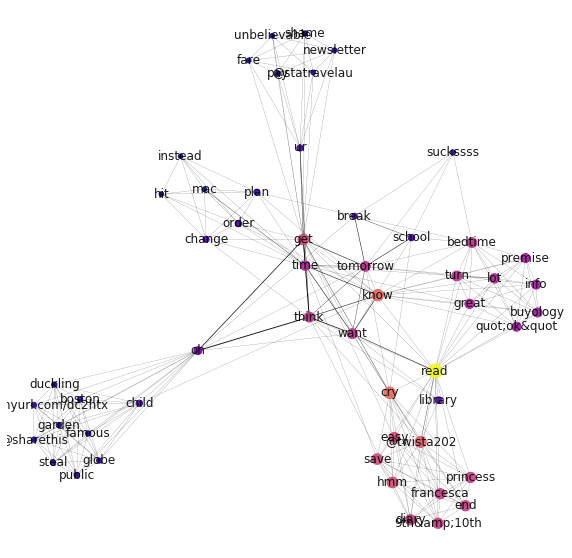

In [65]:
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(centralities.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in g_book2.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_book2.edges(data = True)))
nx.draw(g_book2, ax = ax, pos = layout_book, labels = {n:n for n in g_book2.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_book2.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities[n] / maxC for n in g_book2.nodes],
        node_size = [centralities[n] / maxC * 200 for n in g_book2.nodes],
        cmap = plt.get_cmap('plasma'))

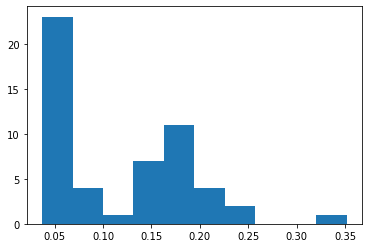

In [66]:
plt.hist(list(centralities.values()))
plt.show()

In [67]:
sorted(centralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('read', 0.35136903444641776),
 ('cry', 0.23377076359210608),
 ('know', 0.22941240921789433),
 ('@twista202', 0.2194028759957921),
 ('easy', 0.2009300725561041),
 ('hmm', 0.19937655452856265),
 ('save', 0.198158379253163),
 ('get', 0.19383015620224722),
 ('diary', 0.1855017261693983),
 ('francesca', 0.18550172616939828)]

In [68]:
sorted(centralities.items(), key = lambda x: x[1], reverse = True)[-10:]

[('suckssss', 0.0402390580287194),
 ('newsletter', 0.039610253875510426),
 ('fare', 0.039610253875510426),
 ('shame', 0.039610253875510426),
 ('pay', 0.039610253875510426),
 ('unbelievable', 0.039610253875510426),
 ('@statravelau', 0.039610253875510426),
 ('instead', 0.03726012038861384),
 ('hit', 0.03726012038861384),
 ('mac', 0.03726012038861384)]

In [69]:
def filterWords(G, minWeight = 3, filter_ = "betweenness", rule = "number", value_of_rule = 200):
    """Function to filter network by degree centrality measures"""
    G = G.copy()
    try:
        G.remove_edges_from([(n1,n2) for n1, n2, d in G.edges(data = True) if d['weight'] < minWeight])
    except:
        print("weight might be missing from one or more edges")
        raise
    if filter_ =="betweenness":
        index = nx.betweenness_centrality(G) #betweeness centrality score
    elif filter_ == "closeness":
        index = nx.closeness_centrality(G) #closeness centrality score
    elif filter_ == "eigenvector":
        index = nx.eigenvector_centrality(G) #eigenvector centrality score
    elif filter_ == "degree":
        index = nx.degree_centrality(G) #degree centrality score
    else:
        raise ValueError("wrong filter paremeter, should be: betweenness/closeness/eigenvector")    
        
    if rule=='number':# if filter by limiting the total number of nodes 
        
        sorted_index = sorted(index.items(), key=lambda x:x[1], reverse=True)
        value_of_rule = np.min([value_of_rule, len(G.nodes)])
        
        nodes_remain = {}
        for word, centr in sorted_index[:value_of_rule]:
            nodes_remain[word] = centr
        G.remove_nodes_from([n for n in index if n not in nodes_remain])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G
    
    if rule=='above':# if filter by limiting the min value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] >=value_of_rule])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G
    
    if rule=='below':# if filter by limiting the max value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] <=value_of_rule])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G

In [70]:
giant_filtered30 = filterWords(g_book2, minWeight=3, filter_='betweenness', rule='number', value_of_rule=25)
print(nx.info(giant_filtered30))

Total number of nodes(after filtering) in the graph is 25
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 10
Average degree:   0.8000


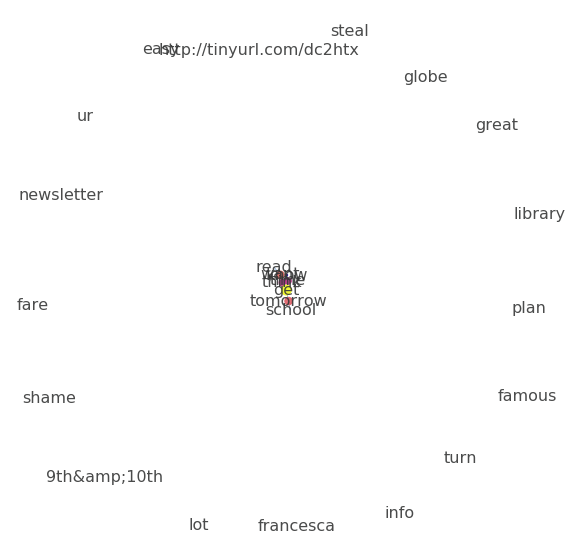

In [71]:
layout_giant_filtered30 = nx.spring_layout(giant_filtered30, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_giant30 = nx.betweenness_centrality(giant_filtered30)
maxC = max(centralities_giant30.items(), key = lambda x : x[1])[1]
nx.draw(giant_filtered30, ax = ax, pos = layout_giant_filtered30, labels = {n: n for n in giant_filtered30.nodes()},
        alpha = .9, 
        width = .5,
        node_color = [centralities_giant30[n] / maxC for n in giant_filtered30.nodes],
        node_size = [centralities_giant30[n] / maxC * 100 for n in giant_filtered30.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

In [72]:
nx.density(g_book2)

0.19158200290275762

In [73]:
np.mean([v for w,v in nx.degree(g_book2)])

9.962264150943396

In [74]:
nx.diameter(g_book2)

4

In [75]:
'''Construct cells immediately below this that calculate different kinds of centrality for distinct words or documents in a network composed from your corpus of interest. Which type of words tend to be most and least central? Can you identify how different centrality measures distinguish different kind of words in your corpus? What do these patterns suggest about the semantic content and structure of your documents? Finally, calculate global measure for your network(s) and discuss what they reveal.'''



'Construct cells immediately below this that calculate different kinds of centrality for distinct words or documents in a network composed from your corpus of interest. Which type of words tend to be most and least central? Can you identify how different centrality measures distinguish different kind of words in your corpus? What do these patterns suggest about the semantic content and structure of your documents? Finally, calculate global measure for your network(s) and discuss what they reveal.'

In [76]:
#Exercise 3
df

,id,timestamp,query,username,text,tokenized_sents,normalized_sents
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[[is, upset, that, he, ca, n't, update, his, F...","[[upset, update, facebook, texting, cry, resul..."
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,"[[@Kenichan], [I, dived, many, times, for, the...","[[@kenichan, dive, time, ball, manage, save, r..."
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[[my, whole, body, feels, itchy, and, like, it...","[[body, feel, itchy, like, fire]]"
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","[[@nationwideclass, no, it, 's, not, behaving,...","[[@nationwideclass, behave, be, mad], [@nation..."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,"[[@Kwesidei], [not, the, whole, crew]]","[[@kwesidei, crow], [@kwesidei, crow]]"
...,...,...,...,...,...,...,...
995,1468055266,Mon Apr 06 23:28:41 PDT 2009,NO_QUERY,ohmigosh_dusti,@t_wolfe i miss u too. i'm totally comin back...,"[[@t_wolfe], [i, miss, u, too], [i, 'm, totall...","[[@t_wolfe, miss, u, be, totally, comin, tho, ..."
996,1468055472,Mon Apr 06 23:28:43 PDT 2009,NO_QUERY,tiphaniebrooke,@sniffinglue ohhh. I love it. ps I'm sad we di...,"[[@sniffinglue, ohhh], [I, love, it], [ps], [I...","[[@sniffinglue, ohhh, love, ps, be, sad, hang]..."
997,1468055604,Mon Apr 06 23:28:45 PDT 2009,NO_QUERY,rinahannah,And somehow I still end up in this place,"[[And, somehow, I, still, end, up, in, this, p...","[[end, place]]"
998,1468055791,Mon Apr 06 23:28:49 PDT 2009,NO_QUERY,ecjc,"@kisluvkis oh that is very sad, poor boy.","[[@kisluvkis], [oh], [that, is, very, sad, poo...","[[@kisluvkis, oh, sad, poor, boy], [@kisluvkis..."


In [77]:
df_part = df.iloc[:8000,:]
df_part[:3]

,id,timestamp,query,username,text,tokenized_sents,normalized_sents
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[[is, upset, that, he, ca, n't, update, his, F...","[[upset, update, facebook, texting, cry, resul..."
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,"[[@Kenichan], [I, dived, many, times, for, the...","[[@kenichan, dive, time, ball, manage, save, r..."
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[[my, whole, body, feels, itchy, and, like, it...","[[body, feel, itchy, like, fire]]"


In [78]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [79]:
def posCooccurrence(sentences, *posType, makeMatrix = False):
    words = set()
    reducedSents = []
    #Only using the first kind of POS for each word
    wordsMap = {}
    for sent in sentences:
        s = [(w, t) for w, t in lucem_illud_2020.spacy_pos(sent) if t in posType]
        for w, t in s:
            if w not in wordsMap:
                wordsMap[w] = t
        reducedSent = [w for w, t in s]
        words |= set(reducedSent)
        reducedSents.append(reducedSent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in reducedSents:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        for w in g.nodes:
            g.nodes[w]['bipartite'] = wordsMap[w]
        return g

In [80]:
gNN = posCooccurrence(df_part['normalized_sents'].sum(), 'NN')

In [81]:
print(nx.info(gNN))

Name: 
Type: Graph
Number of nodes: 907
Number of edges: 2298
Average degree:   5.0673


In [82]:
gNN.remove_edges_from([(n1, n2) for n1, n2, d in gNN.edges(data = True) if d['weight'] <= 2])
gNN.remove_nodes_from([n for n in gNN.nodes if len(set(gNN.neighbors(n))) <= 20]) 
print(nx.info(gNN))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 52
Average degree:   7.4286


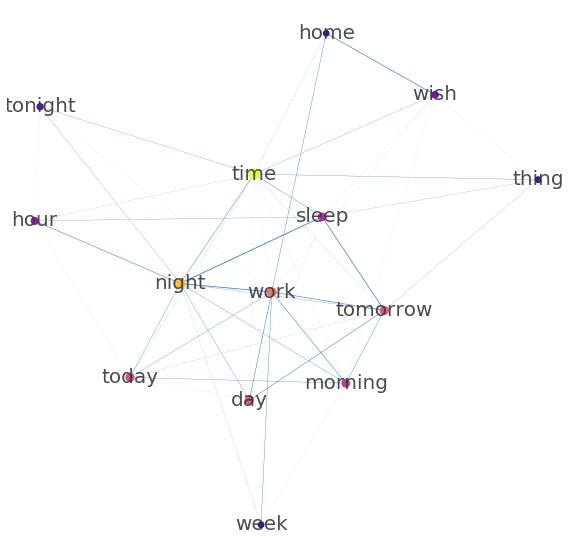

In [83]:
layout_nn = nx.spring_layout(gNN, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nn = nx.eigenvector_centrality(gNN)
maxC = max(centralities_nn.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gNN.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gNN.edges(data = True)))
nx.draw(gNN, ax = ax, pos = layout_nn, labels = {n: n for n in gNN.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gNN.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities_nn[n] / maxC for n in gNN.nodes],
        node_size = [centralities_nn[n] / maxC * 100 for n in gNN.nodes],
        font_size = 20,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

In [95]:
gNV = posCooccurrence(df_part['normalized_sents'].sum(), 'NN', 'VB')

In [85]:
print(nx.info(gNV))

Name: 
Type: Graph
Number of nodes: 1015
Number of edges: 3680
Average degree:   7.2512


In [86]:
gNV.remove_edges_from([(n1,n2) for n1,n2,d in gNV.edges(data = True) if gNV.nodes[n1]['bipartite'] == gNV.nodes[n2]['bipartite']])

In [87]:

print(nx.info(gNV))

Name: 
Type: Graph
Number of nodes: 1015
Number of edges: 1221
Average degree:   2.4059


In [98]:
gNV.remove_edges_from([(n1, n2) for n1, n2, d in gNV.edges(data = True) if d['weight'] <= 5])
gNV.remove_nodes_from([n for n in gNV.nodes if len(set(gNV.neighbors(n))) <= 3])

In [99]:

print(nx.info(gNV))

Name: 
Type: Graph
Number of nodes: 60
Number of edges: 209
Average degree:   6.9667


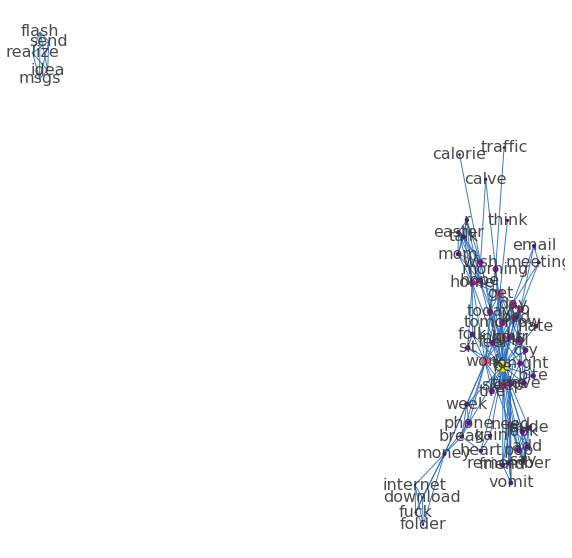

In [100]:
layout_nn = nx.spring_layout(gNV, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nv = nx.eigenvector_centrality(gNV)
maxC = max(centralities_nv.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gNV.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gNV.edges(data = True)))
nx.draw(gNV, ax = ax, pos = layout_nn, labels = {n: n for n in gNV.nodes()},
        #width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gNN.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities_nv[n] / maxC for n in gNV.nodes],
        node_size = [centralities_nv[n] / maxC * 100 for n in gNV.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

In [101]:
g_i = gNV.subgraph(['home'] + list(gNV.neighbors('work')))
print(nx.info(g_i))

Name: 
Type: Graph
Number of nodes: 17
Number of edges: 44
Average degree:   5.1765


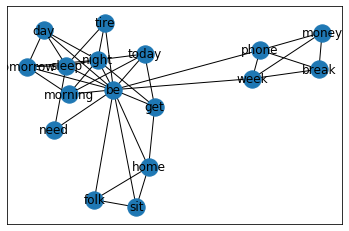

In [102]:

nx.draw_networkx(g_i)

In [103]:
storyNeighbors = gNV.neighbors('morning')
set(storyNeighbors)

{'be', 'calve', 'night', 'today', 'tomorrow', 'traffic', 'work'}

In [104]:
storyNeighbors = set(gNV.neighbors('look'))
storyNeighborsPlus1 = set(storyNeighbors)
for n in storyNeighbors:
    storyNeighborsPlus1 |= set(gNV.neighbors(n))
gNV_story = gNV.subgraph(storyNeighborsPlus1)
print(nx.info(gNV_story))

Name: 
Type: Graph
Number of nodes: 39
Number of edges: 147
Average degree:   7.5385


In [105]:
sorted(nx.degree_centrality(gNV_story).items(), key = lambda x: x[1], reverse = True)[:10]

[('be', 0.9736842105263157),
 ('night', 0.47368421052631576),
 ('work', 0.39473684210526316),
 ('get', 0.3421052631578947),
 ('sleep', 0.3421052631578947),
 ('need', 0.3157894736842105),
 ('time', 0.3157894736842105),
 ('home', 0.23684210526315788),
 ('go', 0.23684210526315788),
 ('lol', 0.21052631578947367)]

In [106]:
sorted(nx.eigenvector_centrality(gNV_story).items(), key = lambda x: x[1], reverse = True)[:10]

[('be', 0.4938418071449448),
 ('night', 0.3059315750057019),
 ('work', 0.25306380915799703),
 ('get', 0.23311131164144894),
 ('sleep', 0.22459567617602247),
 ('time', 0.18954980736960603),
 ('go', 0.1886152451372224),
 ('need', 0.18126413540998465),
 ('day', 0.17169031807429436),
 ('tomorrow', 0.16797217427445793)]

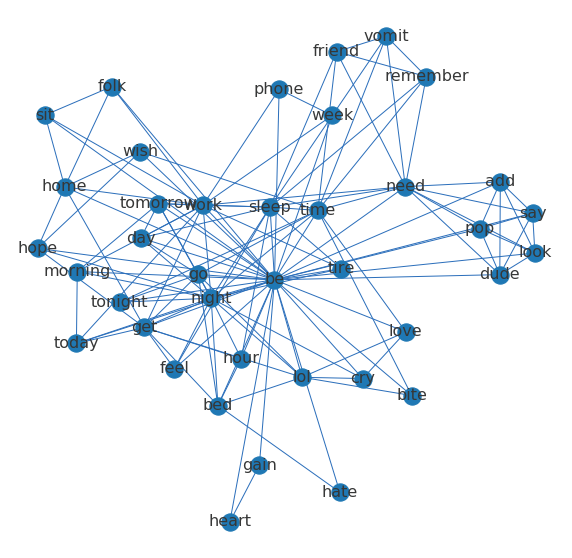

In [107]:
layout_story = nx.spring_layout(gNV_story, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(gNV_story, ax = ax, pos = layout_story, labels = {n: n for n in gNV_story.nodes()},
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
       )

In [108]:
gNJ = posCooccurrence(df_part['normalized_sents'][:5000].sum(), 'NN', 'JJ')
print(nx.info(gNJ))

Name: 
Type: Graph
Number of nodes: 1186
Number of edges: 4194
Average degree:   7.0725


In [109]:
gNJ_filtered200 = filterWords(gNJ, minWeight=3, filter_='betweenness', rule='number', value_of_rule=25)
print(nx.info(gNJ_filtered200))

Total number of nodes(after filtering) in the graph is 25
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 114
Average degree:   9.1200


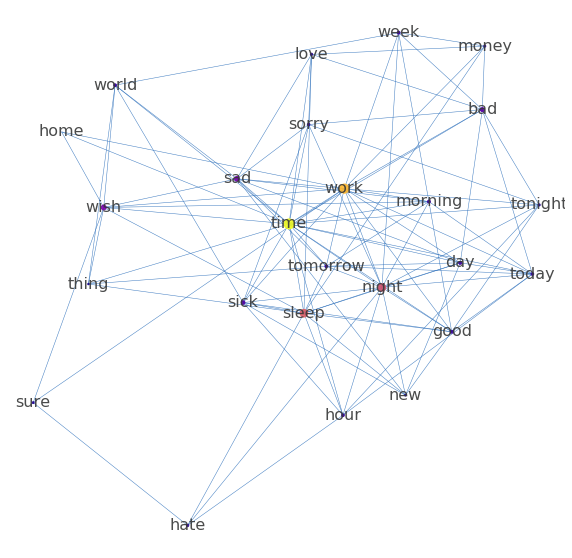

In [110]:
layout_NJ_filtered200 = nx.spring_layout(gNJ_filtered200, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nj200 = nx.betweenness_centrality(gNJ_filtered200)
maxC = max(centralities_nj200.items(), key = lambda x : x[1])[1]
nx.draw(gNJ_filtered200, ax = ax, pos = layout_NJ_filtered200, labels = {n: n for n in gNJ_filtered200.nodes()},
        alpha = .9, 
        width = .5,
        node_color = [centralities_nj200[n] / maxC for n in gNJ_filtered200.nodes],
        node_size = [centralities_nj200[n] / maxC * 100 for n in gNJ_filtered200.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

In [144]:
df['text']

0      [is, upset, that, he, can't, update, his, Face...
1      [@Kenichan, I, dived, many, times, for, the, b...
2      [my, whole, body, feels, itchy, and, like, its...
3      [@nationwideclass, no, ,, it's, not, behaving,...
4                     [@Kwesidei, not, the, whole, crew]
                             ...                        
995    [@t_wolfe, i, miss, u, too, ., i'm, totally, c...
996    [@sniffinglue, ohhh, ., I, love, it, ., ps, I'...
997    [And, somehow, I, still, end, up, in, this, pl...
998    [@kisluvkis, oh, that, is, very, sad, ,, poor,...
999    [@JonathanRKnight, @silver_tulip27, Um, ,, tha...
Name: text, Length: 1000, dtype: object

In [165]:
dool = df_text['text']
dool_str = " ".join(dool)

In [169]:
import nltk
from nltk.tokenize import TweetTokenizer

characters = {}
tknzr = TweetTokenizer()
dool = tknzr.tokenize(dool_str)
for token in dool:
    
        if token[0] == '@':
            # all characters or actions start with @, so we add that to character
            if token not in characters:
                characters[token[1:]] = 1
            if token in characters:
                characters[token[1:]] += 1
len(characters)

376

In [170]:
for character in characters:
        print(character, characters[character])


Kenichan 1
nationwideclass 1
Kwesidei 1
LOLTrish 1
Tatiana_K 1
twittera 1
caregiving 1
octolinz16 1
smarrison 1
iamjazzyfizzle 1
iamlilnicki 1
LettyA 1
FakerPattyPattz 1
alydesigns 1
angry_barista 1
alielayus 1
julieebaby 1
HumpNinja 1
cocomix04 1
MissXu 1
fleurylis 1
JonathanRKnight 1
Viennah 1
jeancjumbe 1
tea 1
localtweeps 1
andywana 1
oanhLove 1
BatManYNG 1
Starrbby 1
katortiz 1
Lt_Algonquin 1
jdarter 1
ninjen 1
ashleyac 1
statravelAU 1
markhardy1974 1
msdrama 1
januarycrimson 1
Hollywoodheat 1
makeherfamous 1
stark 1
mangaaa 1
kpreyes 1
paradisej 1
Henkuyinepu 1
marykatherine_q 1
jacobsummers 1
Alliana07 1
salancaster 1
mercedesashley 1
HibaNick 1
eRRe_sC 1
allyheman 1
grum 1
thecoolestout 1
chelserlynn 1
Knights_ 1
BridgetsBeaches 1
ozesteph1992 1
mrsaintnick 1
twista202 1
rumblepurr 1
onemoreproject 1
jonathanchard 1
RyanSeacrest 1
pinkserendipity 1
marieclr 1
naughtyhaughty 1
penndbad 1
machineplay 1
ColinDeMar 1
dannyvegasbaby 1
supersport 1
robluketic 1
HillyDoP 1
goodlaura 1